In [1]:
from google.colab import drive
drive.mount('drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at drive/


In [0]:
#path settings
import os
os.chdir('drive/My Drive/Gender recognization')

In [3]:
ls

female_pics/                         mix/                  x_cropped.npz
gender_detection_PR.ipynb            Mix_PR/               y_cropped.npz
haarcascade_frontalface_default.xml  saichara_face_recog/
Male_pics/                           Untitled


In [0]:
#import require libraries
import numpy as np
import pandas as pd
import re
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [0]:
import warnings
warnings.filterwarnings('ignore')

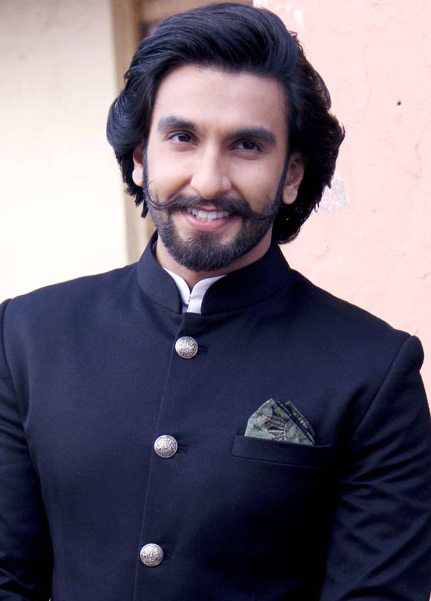

In [6]:
Image.open('Male_pics/1_ (18).jpeg')

In [0]:
# Adding haarcascade classifier for taking the front face
haar = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [0]:
from google.colab.patches import cv2_imshow

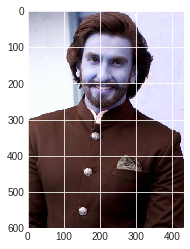

In [9]:
# taking random image from the male folder
img=cv2.imread('Male_pics/1_ (18).jpeg')
plt.imshow(img)

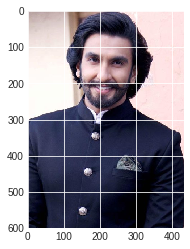

In [10]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [0]:
#CONVERTING IT INTO GRAY COLOR
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [0]:
#Tuning Classifier
face=haar.detectMultiScale(img_gray,scaleFactor=1.1,minNeighbors=1)

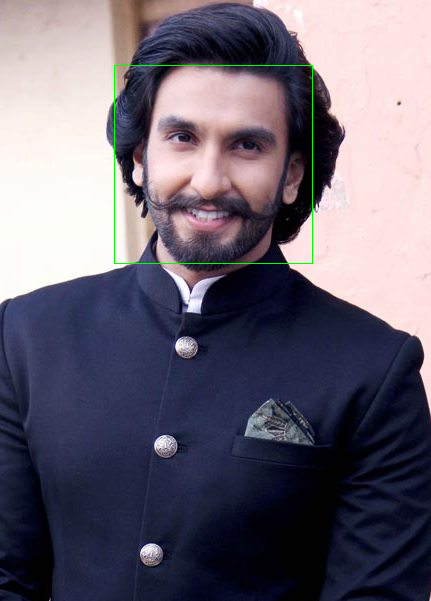

In [13]:
#Detecing Face
for (x,y,w,h) in face:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0))
cv2_imshow(img)

In [0]:
female = "female_pics/"
male = "Male_pics/"

In [0]:
# Applying for loop for male images to label them as 1
haar = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
for img in (os.listdir(male)):
  path = os.path.join(male, img)
  img = cv2.imread(path)
  img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  faces = haar.detectMultiScale(img_gray,scaleFactor=1.1, minNeighbors=1)

  for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
    roi_color = img[y:y + h, x:x + w] 
    cv2.imwrite(str(w) + str(h) + '_1.jpg', roi_color)

In [0]:
# # Applying for loop for female images to label them as 0
haar = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
for img in (os.listdir(female)):
  path = os.path.join(female, img)
  img = cv2.imread(path)
  img_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  faces = haar.detectMultiScale(img_gray,scaleFactor=1.1, minNeighbors=1)

  for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)
    roi_color = img[y:y + h, x:x + w] 
    cv2.imwrite(str(w) + str(h) + '_0.jpg', roi_color)

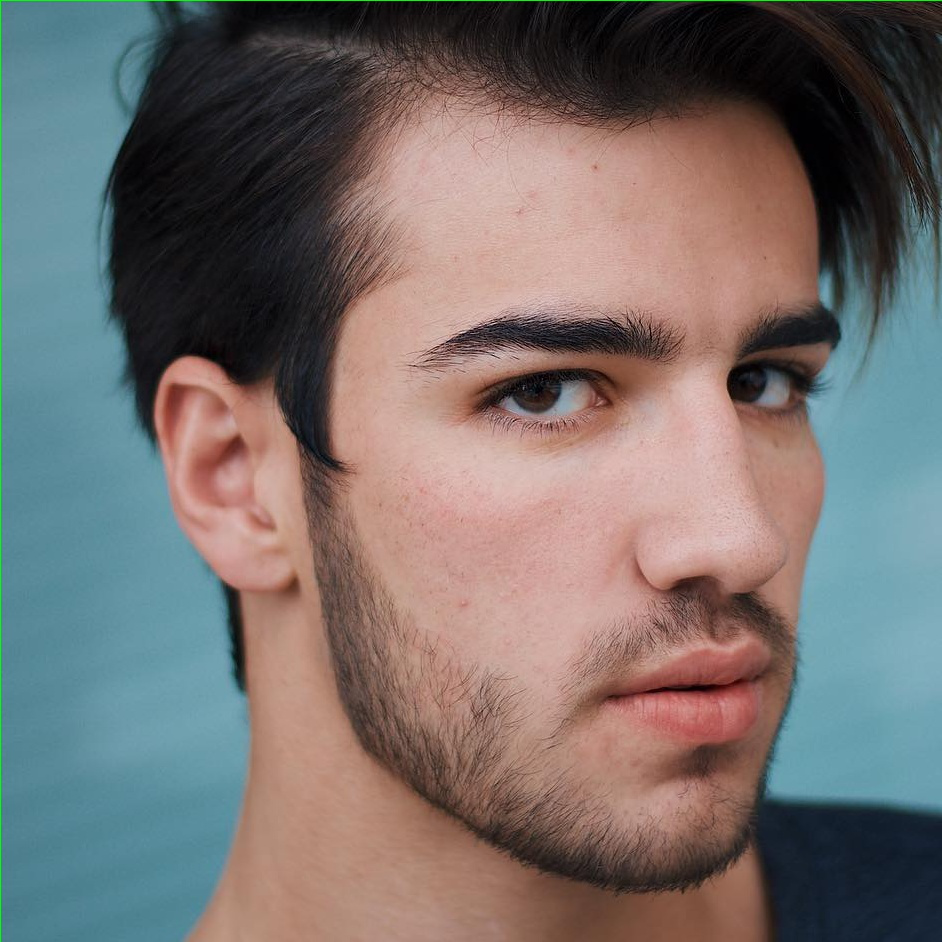

In [15]:
Image.open('./Mix_PR/942942_1.jpg')

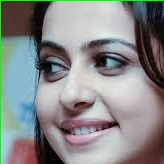

In [16]:
Image.open('./Mix_PR/164164_0.jpg')

In [0]:
## Changing the path to mix folder and applying all the operations
faces='./Mix_PR'

In [0]:
face = []
image_size = 64
for image in (os.listdir(faces)):
  path = os.path.join(faces, image)
  img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (image_size, image_size)).flatten()
  face.append(img)

In [19]:
X = np.array(face)   # X = independent variable
X.shape, X.flatten().shape

((263, 4096), (1077248,))

In [20]:
os.path.splitext('164164_0.jpg')
label=os.path.splitext('164164_0.jpg')[0]
gen=label.partition('_')[2]
gen=int(gen)
gen,type(gen)

(0, int)

In [0]:
gen_y=[]
for image in (os.listdir(faces)):
  os.path.splitext(image)
  label=os.path.splitext(image)[0]
  gen=label.partition('_')[2]
  gen=int(gen)
  gen_y.append(gen)

In [0]:
#gen_y

In [22]:
y=np.array(gen_y)#y=dependent variable
y.shape

(263,)

In [23]:
gen,count=np.unique(y,return_counts=True)
dict(zip(gen,count))

{0: 121, 1: 142}

In [24]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Saving into ZIP

In [0]:
np.savez_compressed('x_cropped.npz',X)
np.savez_compressed('y_cropped.npz',y)

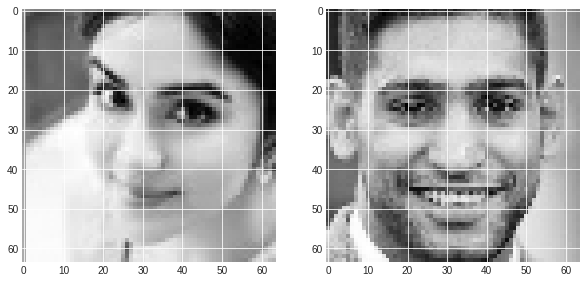

In [26]:
#Display the imagw we extracted
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
row=X[-11]
row_1=row.reshape((image_size,image_size))
plt.imshow(row_1,cmap='gray');
plt.subplot(1,2,2)
row=X[2]
row_1=row.reshape((image_size,image_size))
plt.imshow(row_1,cmap='gray');

In [27]:
X=np.load('x_cropped.npz')
X=X.f.arr_0
X.shape

(263, 4096)

In [28]:
X

array([[ 74,  83,  82, ..., 217, 168, 145],
       [ 69,  71,  55, ...,  38,  35,  35],
       [ 46,  38,  30, ..., 185, 179, 172],
       ...,
       [145, 126, 127, ...,  41,  46,  51],
       [148, 140, 138, ...,  27,  26,  20],
       [169, 184, 144, ...,   2,   2,   2]], dtype=uint8)

In [29]:
y=np.load('y_cropped.npz')
y=y.f.arr_0
y.shape

(263,)

In [30]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Train and Test

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
x_train_reshape=x_train.reshape(-1,image_size,image_size,1)
x_test_reshape=x_test.reshape(-1,image_size,image_size,1)

In [33]:
x_train_reshape.shape,x_test_reshape.shape

((210, 64, 64, 1), (53, 64, 64, 1))

In [34]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization
tf.__version__

'1.15.0'

In [0]:
# define CNN
def CNN():
  model = Sequential()
  model.add(Conv2D(filters=64,input_shape=(64,64,1),kernel_size =    
  (3,3),activation='relu',strides=   (1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))


  model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))


  model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))


  model.add(Conv2D(filters=512,kernel_size=(3,3),activation='relu',strides=(1,1),padding="same",kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(0.5))


  model.add(Flatten())


  model.add(Dense(units=4096,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(Dense(units=1000,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
  model.add(Dense(units=2,activation='softmax'))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])
  return model

In [36]:
#def and print summary
cnn = CNN()
print(cnn.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________

In [0]:
#saving for cross validation
cross_board = TensorBoard('cross_board')

In [61]:
history=cnn.fit(x=x_train_reshape,y=y_train,batch_size=30,epochs=15,callbacks=[cross_board],validation_data=[x_test_reshape,y_test])

Train on 210 samples, validate on 53 samples
Epoch 1/15
210/210 [==============================] - 0s 934us/sample - loss: 20.0214 - acc: 0.9286 - val_loss: 19.0622 - val_acc: 0.8113
Epoch 2/15
210/210 [==============================] - 0s 891us/sample - loss: 17.9764 - acc: 0.9190 - val_loss: 17.1807 - val_acc: 0.8113
Epoch 3/15
210/210 [==============================] - 0s 887us/sample - loss: 16.2089 - acc: 0.9381 - val_loss: 15.6595 - val_acc: 0.7358
Epoch 4/15
210/210 [==============================] - 0s 906us/sample - loss: 14.8620 - acc: 0.9095 - val_loss: 14.2928 - val_acc: 0.7925
Epoch 5/15
210/210 [==============================] - 0s 886us/sample - loss: 13.5387 - acc: 0.9381 - val_loss: 13.2391 - val_acc: 0.7925
Epoch 6/15
210/210 [==============================] - 0s 875us/sample - loss: 12.4935 - acc: 0.9381 - val_loss: 12.1830 - val_acc: 0.8302
Epoch 7/15
210/210 [==============================] - 0s 905us/sample - loss: 11.4809 - acc: 0.9619 - val_loss: 11.3110 - val_a

In [0]:
#saving the history of loss so we can plot
data_loss_nn=pd.DataFrame(history.history)

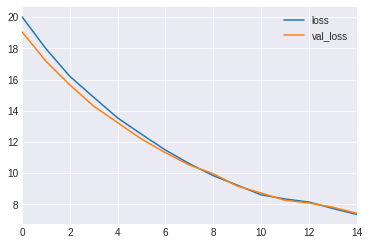

In [63]:
#plot
data_loss_nn[['loss','val_loss']].plot(kind='line');

#Model has been build, time to test the model



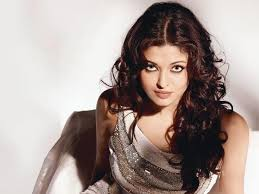

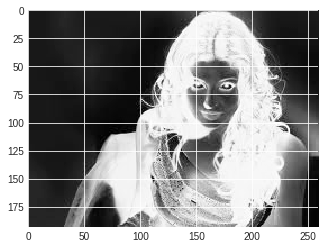

In [64]:
in_img=cv2.imread('./female_pics/0_ (15).jpeg')
gray=cv2.cvtColor(in_img,cv2.COLOR_RGB2GRAY)#converting into gray scale
cv2_imshow(in_img)
plt.imshow(gray);

### Now with help of Haarcascade model we will try to predict Male or Female

In [0]:
gender=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
gender=gender.detectMultiScale(gray,1.3,3)

Gender: female


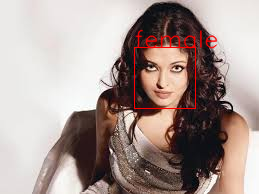

In [66]:
labels = ['female','male'] # I have taken label as Male and Female inspite of 0 and 1
for (x, y, w, h) in gender:
  roi_gray = gray[y:y + h, x:x + w]
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (64, 64)), -1), 0)
  cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F) #normalize
  cv2.rectangle(in_img, (x, y), (x + w, y + h), (0, 0, 255), 1)
    
  yhat= cnn.predict(cropped_img)
        
  cv2.putText(in_img, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
  print("Gender: "+labels[int(np.argmax(yhat))])

cv2_imshow(in_img)

# Our model detected female as female which seems good


In [0]:
faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = faces.detectMultiScale(gray, 1.3  , 3)

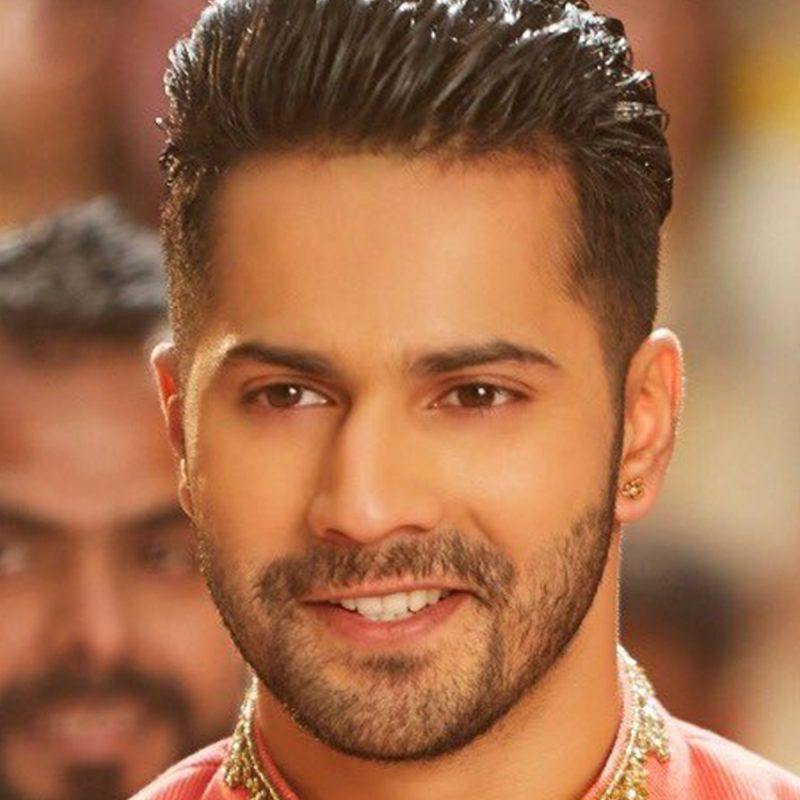

In [68]:
in_img=cv2.imread('./Male_pics/1_ (17).jpg')
cv2_imshow(in_img)

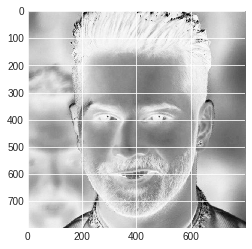

In [69]:
gray = cv2.cvtColor(in_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray);

Gender: male


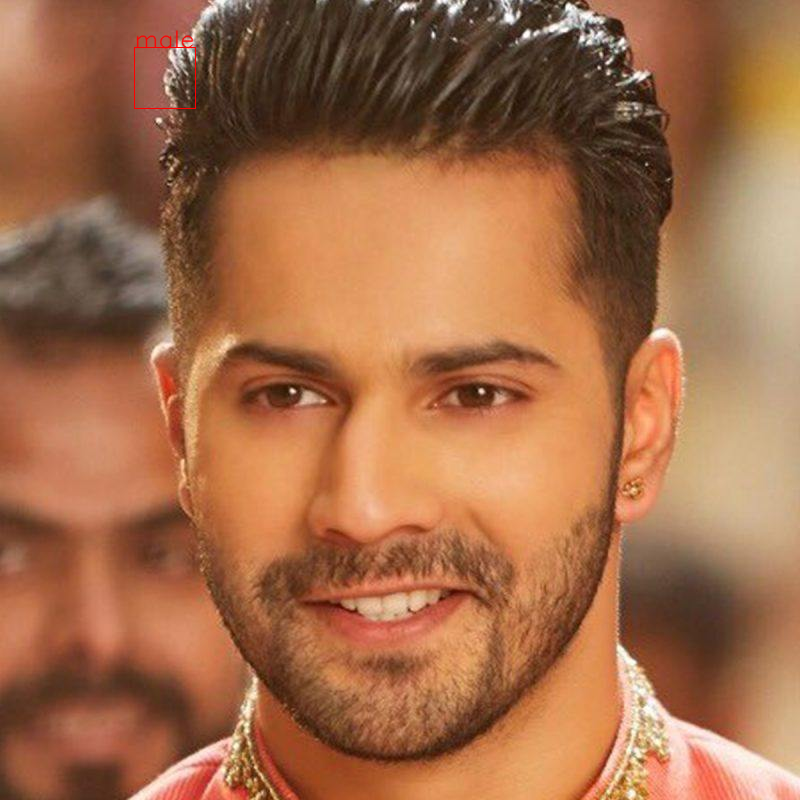

In [70]:
labels = ['female','male']
for (x, y, w, h) in faces:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (64, 64)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(in_img, (x, y), (x + w, y + h), (0, 0, 255), 1)
        yhat= cnn.predict(cropped_img)
        cv2.putText(in_img, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
        print("Gender: "+labels[int(np.argmax(yhat))])

cv2_imshow(in_img)

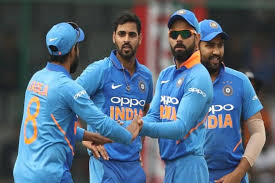

In [71]:
in_img=cv2.imread('./india.jpg')
cv2_imshow(in_img)

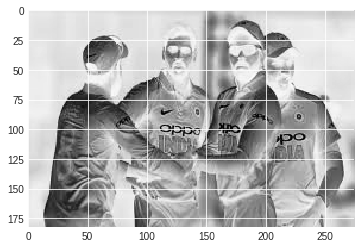

In [72]:
gray=cv2.cvtColor(in_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray);

In [0]:
group=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
group=group.detectMultiScale(gray,1.1,5)

Gender: male
Gender: male


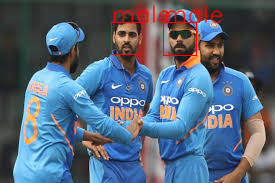

In [74]:
labels = ['female','male']
for (x, y, w, h) in group:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (64, 64)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(in_img, (x, y), (x + w, y + h), (0, 0, 255), 1)
        yhat= cnn.predict(cropped_img)
        cv2.putText(in_img, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
        print("Gender: "+labels[int(np.argmax(yhat))])

cv2_imshow(in_img)

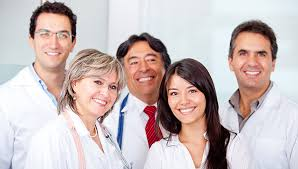

In [84]:
in_img=cv2.imread('./images.jpg')
cv2_imshow(in_img)

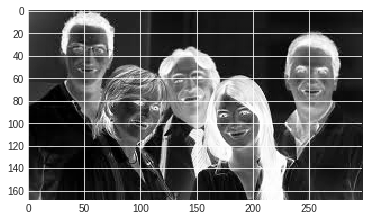

In [85]:
gray=cv2.cvtColor(in_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray);

In [0]:
group=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
group=group.detectMultiScale(gray,1.1,5)

Gender: male
Gender: male
Gender: female


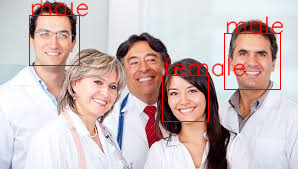

In [87]:
labels = ['female','male']
for (x, y, w, h) in group:
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (64, 64)), -1), 0)
        cv2.normalize(cropped_img, cropped_img, alpha=0, beta=1, norm_type=cv2.NORM_L2, dtype=cv2.CV_32F)
        cv2.rectangle(in_img, (x, y), (x + w, y + h), (0, 0, 255), 1)
        yhat= cnn.predict(cropped_img)
        cv2.putText(in_img, labels[int(np.argmax(yhat))], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 1, cv2.LINE_AA)
        print("Gender: "+labels[int(np.argmax(yhat))])

cv2_imshow(in_img)